1). Loading library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
import sklearn as skl
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgbm
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from lightgbm import LGBMClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score,accuracy_score, classification_report
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.neighbors import KNeighborsClassifier

In [2]:
train=pd.read_csv('/content/NigeriaAutoInsurance_Vehicle.csv')
StateName=pd.read_csv('/content/NigerianStateNames.csv')

3). Exploring and transforming data

In [3]:
train.head()

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,ID_00N7XT1,2010-07-06,2011-07-05,Female,71,2010-07-06,2,JEEP,Black,REXTON,Badagry,Benue,Car Classic,0
1,ID_01ZY7FF,2010-08-07,2011-08-06,Male,30,2010-08-07,1,Saloon,Grey,TOYOTA,Ikeja,Lagos,Car Classic,1
2,ID_022U6TV,2010-10-28,2011-10-27,Male,40,2010-10-28,2,Saloon,Black,Honda,Abuja Municipal,Abuja-Municipal,Car Classic,0
3,ID_02DJWEN,2010-01-23,2011-01-16,Male,41,2010-01-23,1,Saloon,Silver,TOYOTA,Yaba,Benue,Car Classic,0
4,ID_03U3I31,2010-09-06,2011-09-05,Male,39,2010-09-06,2,Saloon,Red,TOYOTA,Oshodi-Isolo,Oshodi-Isolo,Car Classic,0


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2667 entries, 0 to 2666
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   ID                      2667 non-null   object
 1   Policy Start Date       2667 non-null   object
 2   Policy End Date         2667 non-null   object
 3   Gender                  2667 non-null   object
 4   Age                     2667 non-null   int64 
 5   First Transaction Date  2667 non-null   object
 6   No_Pol                  2667 non-null   int64 
 7   Car_Category            2667 non-null   object
 8   Subject_Car_Colour      2667 non-null   object
 9   Subject_Car_Make        2667 non-null   object
 10  LGA_Name                2667 non-null   object
 11  State                   2667 non-null   object
 12  ProductName             2667 non-null   object
 13  target                  2667 non-null   int64 
dtypes: int64(3), object(11)
memory usage: 291.8+ KB


In [5]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2667.0,45.110611,18.732415,-27.0,36.0,42.0,51.0,320.0
No_Pol,2667.0,1.499063,0.805725,1.0,1.0,1.0,2.0,7.0
target,2667.0,0.187477,0.390367,0.0,0.0,0.0,0.0,1.0


In [6]:
for col in train.columns:
  print(f'The number of unique values of {col}: {len(train[col].unique())}')

The number of unique values of ID: 2667
The number of unique values of Policy Start Date: 344
The number of unique values of Policy End Date: 350
The number of unique values of Gender: 6
The number of unique values of Age: 88
The number of unique values of First Transaction Date: 344
The number of unique values of No_Pol: 7
The number of unique values of Car_Category: 14
The number of unique values of Subject_Car_Colour: 34
The number of unique values of Subject_Car_Make: 45
The number of unique values of LGA_Name: 202
The number of unique values of State: 88
The number of unique values of ProductName: 9
The number of unique values of target: 2


3.1). Dealing with age

In [7]:
train[train['Age']<0]

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
255,ID_3QOZW9J,2010-03-15,2011-03-14,Male,-2,2010-03-15,1,Saloon,Black,TOYOTA,Ibadan South East,Ibadan-East,Customized Motor,0
569,ID_7OMERTL,2010-04-23,2011-04-22,Male,-12,2010-04-23,3,Saloon,As Attached,Hyundai,Victoria Island,Lagos,Car Plus,0
1668,ID_N21XK5R,2010-04-23,2011-04-22,Male,-27,2010-04-23,2,JEEP,Blue,TOYOTA,Ilesha West,Ilesha-West,Car Classic,1


In [8]:
train['Age']=train['Age'].abs()

In [9]:
train.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,2667.0,45.141357,18.658173,0.0,36.0,42.0,51.0,320.0
No_Pol,2667.0,1.499063,0.805725,1.0,1.0,1.0,2.0,7.0
target,2667.0,0.187477,0.390367,0.0,0.0,0.0,0.0,1.0


In [10]:
train[train['Age']>100]

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
21,ID_0BNN4SR,2010-07-31,2011-07-30,Female,120,2010-07-31,1,Saloon,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
64,ID_13D8KE6,2010-05-16,2011-05-15,Entity,120,2010-05-16,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,0
207,ID_2WEXEBY,2010-04-18,2011-04-17,Male,120,2010-04-18,1,Bus,White,Scania,Victoria Island,Lagos,CVTP,0
235,ID_3GMJR1Z,2010-05-14,2011-05-13,Entity,120,2010-05-14,3,Saloon,Silver,TOYOTA,Lagos Island,Lagos,Car Classic,0
265,ID_3U7GP0U,2010-07-02,2011-07-01,Male,120,2010-07-02,1,Truck,Red,Iveco,Victoria Island,Lagos,CVTP,1
419,ID_5WP561N,2010-07-23,2011-07-22,Male,120,2010-07-23,1,Bus,White,Volkswagen,Victoria Island,Lagos,CVTP,0
474,ID_6O67NWQ,2010-06-28,2011-06-27,Male,120,2010-06-28,1,Truck,White,Iveco,Victoria Island,Lagos,CVTP,0
518,ID_76G0BAZ,2010-05-02,2011-05-01,Male,120,2010-05-02,1,Truck,Blue,Iveco,Victoria Island,Lagos,CVTP,1
564,ID_7NHCEJS,2010-07-03,2011-07-02,Male,120,2010-07-03,1,Saloon,Silver,Honda,Abuja,Abuja,Customized Motor,0
594,ID_7YCA0E9,2010-05-16,2011-05-15,Entity,120,2010-05-16,2,JEEP,Black,TOYOTA,Victoria Island,Lagos,Car Classic,1


In [11]:
#It seems a common error on 320years
#we replace 320 to 32
train['Age'].replace({320:32}, inplace=True)

In [12]:
train.Age.describe().transpose()

count    2667.000000
mean       44.925384
std        17.074416
min         0.000000
25%        36.000000
50%        42.000000
75%        51.000000
max       120.000000
Name: Age, dtype: float64

3.2). Dealing with LGA_Names and state

In [13]:
train[(train.LGA_Name.isnull()) & (~train.State.isnull())]

,ID,Policy Start Date,Policy End Date,Gender,Age,First Transaction Date,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target


In [14]:
StateName['LGA'] = StateName.LGA.str.replace('--',' ').str.replace('-',' ').str.title()
train['LGA_Name'] = train.LGA_Name.str.replace('-',' ').str.replace('/',' ').str.title()
train['LGA_Name'] = train.LGA_Name.str.replace('.',' ').str.replace(',','').str.strip()

In [15]:
LGA_not_found = []
for lga_name in train.LGA_Name:
  if lga_name not in StateName.LGA.unique():
    LGA_not_found.append(lga_name)

len(list(set(LGA_not_found)))

11

In [16]:

list(set(LGA_not_found))

['Bekwara',
 'Ogudu',
 'Ogba',
 'Obia Akpor',
 'AjegunleLagos  State',
 'Ifako Ijaye',
 'Somolu',
 'Ogbmosho South',
 'Ovia Southwest',
 'Olamabolo',
 'Ilesha West']

In [17]:
for lga in StateName.LGA.unique():
  if  (type(lga) != float):
    if ('Shomolu' in lga):
      print(lga)

Shomolu


In [18]:

correct_LGA = {
               'Obia Akpor':'Obio Akpor',
               'Ogbmosho South':'Ogbomosho South',
               'Ovia Southwest':'Ovia South West',
               'Ovia Southwest':'Ovia South West',
               'Ilesha East':'Ilesa East',
               'Ilesha West':'Ilesa West',
               'Ogudu':'Ojota',
               'Olamabolo':'Olamaboro',
                'Calabar Municipality':'Calabar Municipal',
               'Calabar Municipality':'Calabar Municipal',
               'Ifako Ijaye':'Ifako Ijaiye',
               'AjegunleLagos  State':'Ajegunle Lagos State',
               'Bekwara':'Bekwarra',
               'Ogba':'Ogbadibo',
               'Somolu':'Shomolu'
               }

train['LGA_Name'] = train['LGA_Name'].replace(correct_LGA)

In [19]:
train['State'] = train['LGA_Name'].replace(dict(zip(StateName.LGA,StateName.State)))

3.3. Dealing With Subject_Car_Colour

In [20]:
train.Subject_Car_Colour.value_counts().to_frame()

,Subject_Car_Colour
Black,1147
Silver,264
Grey,258
Blue,174
As Attached,165
Green,153
White,143
Red,125
Gold,74
Ash,43


In [21]:
modified_colors = {'Ash':'Grey',
                   'Wine':'Red',
                   'Cream':'White',
                   'Champagne':'Beige',
                   'Burgundy':'Red'}

train['Subject_Car_Colour'] = train.Subject_Car_Colour.replace(modified_colors)

In [22]:
train['Gender'].value_counts()

Male            1673
Female           820
Entity            91
Joint Gender      56
NO GENDER         20
NOT STATED         7
Name: Gender, dtype: int64

In [23]:
train['Gender'] = train['Gender'].replace({'Entity': 'Other',
                                                'Joint Gender':'Other',
                                                'NOT STATED':'Other',
                                                'NO GENDER': 'Other',
                                                'SEX':'Other'})
train['Gender'].value_counts()

Male      1673
Female     820
Other      174
Name: Gender, dtype: int64

4. Building Model

In [24]:
train=train[['Gender','Age','No_Pol','Car_Category','Subject_Car_Colour', 'Subject_Car_Make', 'LGA_Name', 'State','ProductName', 'target']]
dd=train.copy()
train.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,Female,71,2,JEEP,Black,REXTON,Badagry,Lagos State,Car Classic,0
1,Male,30,1,Saloon,Grey,TOYOTA,Ikeja,Lagos State,Car Classic,1
2,Male,40,2,Saloon,Black,Honda,Abuja Municipal,Abuja-Municipal-Area-Council,Car Classic,0
3,Male,41,1,Saloon,Silver,TOYOTA,Yaba,Lagos-Mainland,Car Classic,0
4,Male,39,2,Saloon,Red,TOYOTA,Oshodi Isolo,Lagos State,Car Classic,0


In [25]:
le_gender=LabelEncoder()
train['Gender']=le_gender.fit_transform(train['Gender'])
le_category=LabelEncoder()
train['Car_Category']=le_category.fit_transform(train['Car_Category'])
le_color=LabelEncoder()
train['Subject_Car_Colour']=le_color.fit_transform(train['Subject_Car_Colour'])
le_make=LabelEncoder()
train['Subject_Car_Make']=le_make.fit_transform(train['Subject_Car_Make'])

le_lga=LabelEncoder()
train['LGA_Name']=le_category.fit_transform(train['LGA_Name'])
le_state=LabelEncoder()
train['State']=le_color.fit_transform(train['State'])
le_product=LabelEncoder()
train['ProductName']=le_make.fit_transform(train['ProductName'])

In [26]:
train.head()

,Gender,Age,No_Pol,Car_Category,Subject_Car_Colour,Subject_Car_Make,LGA_Name,State,ProductName,target
0,0,71,2,1,4,34,38,51,1,0
1,1,30,1,7,16,41,85,51,1,1
2,1,40,2,7,4,13,6,1,1,0
3,1,41,1,7,24,41,196,52,1,0
4,1,39,2,7,22,41,163,51,1,0


### ttttttttttt

In [27]:
X = train.drop(['target'], axis=1)
y = train['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Train LightGBM model
lgbm_model = LGBMClassifier(random_state=42)
lgbm_model.fit(X_train, y_train)

# Train KNN model
knn_model = KNeighborsClassifier(n_neighbors=5)
knn_model.fit(X_train_scaled, y_train)

# Make predictions
rf_preds = rf_model.predict(X_test)
lgbm_preds = lgbm_model.predict(X_test)
knn_preds = knn_model.predict(X_test_scaled)

# Evaluate models
rf_accuracy = accuracy_score(y_test, rf_preds)
lgbm_accuracy = accuracy_score(y_test, lgbm_preds)
knn_accuracy = accuracy_score(y_test, knn_preds)

# Print results
print("Random Forest Accuracy:", rf_accuracy)
print("LightGBM Accuracy:", lgbm_accuracy)
print("KNN Accuracy:", knn_accuracy)

# Compare other metrics (precision, recall, f1-score) using classification_report if needed
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_preds))
print("KNN Classification Report:\n", classification_report(y_test, knn_preds))


[LightGBM] [Info] Number of positive: 401, number of negative: 1732
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000457 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 315
[LightGBM] [Info] Number of data points in the train set: 2133, number of used features: 9
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.187998 -> initscore=-1.463071
[LightGBM] [Info] Start training from score -1.463071
Random Forest Accuracy: 0.7659176029962547
LightGBM Accuracy: 0.7808988764044944
KNN Accuracy: 0.7865168539325843
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.90      0.86       435
           1       0.29      0.18      0.22        99

    accuracy                           0.77       534
   macro avg       0.56      0.54      0.54       534
weighted avg       0.73 

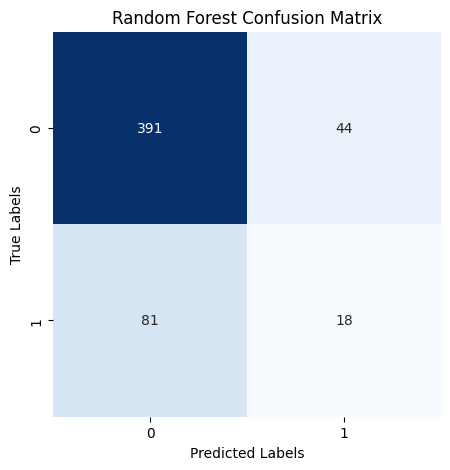

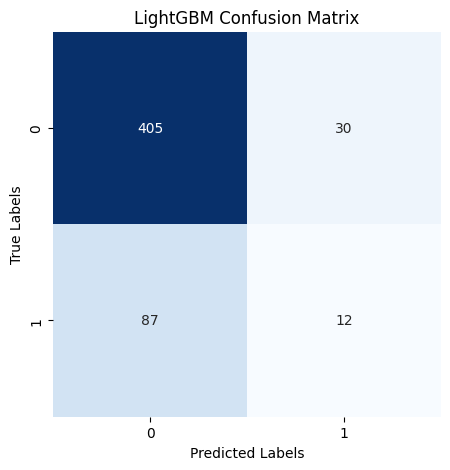

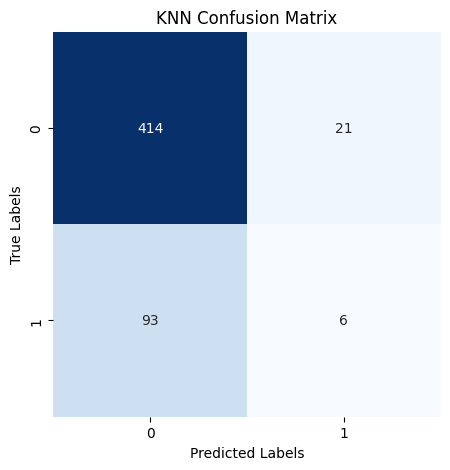

In [28]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# List of model names
model_names = ['Random Forest', 'LightGBM', 'KNN']
predictions = [rf_preds, lgbm_preds, knn_preds]

for model_name, y_pred in zip(model_names, predictions):
    cm = confusion_matrix(y_test, y_pred)

    plt.figure(figsize=(5, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False)
    plt.title(f'{model_name} Confusion Matrix')
    plt.xlabel('Predicted Labels')
    plt.savefig(f'{model_name}.png')
    plt.ylabel('True Labels')

    # Save the plot
    plt.savefig(f'{model_name}_confusion_matrix.png')
    plt.show()
